In [6]:
import requests
import pandas as pd

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Pulls data from Bitcoin and Ether for the last 7 days

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-08-18 22:21:38.704861')

In [9]:
btc = get_historic_price('btc','bitstamp', after=last_week)

In [10]:
eth = get_historic_price('eth','bitstamp', after=last_week)

In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-08-18 23:00:00,12068.62,12099.99,12034.07,12048.83,343.780242,4.145110e+06
2020-08-19 00:00:00,12048.15,12050.59,11949.28,11958.10,366.843973,4.403090e+06
2020-08-19 01:00:00,11950.00,12003.41,11925.82,11987.47,291.486622,3.486551e+06
2020-08-19 02:00:00,11992.37,12022.18,11959.85,11979.00,83.166304,9.980784e+05
2020-08-19 03:00:00,11974.44,11978.48,11900.00,11919.35,608.771374,7.260582e+06


<AxesSubplot:xlabel='CloseTime'>

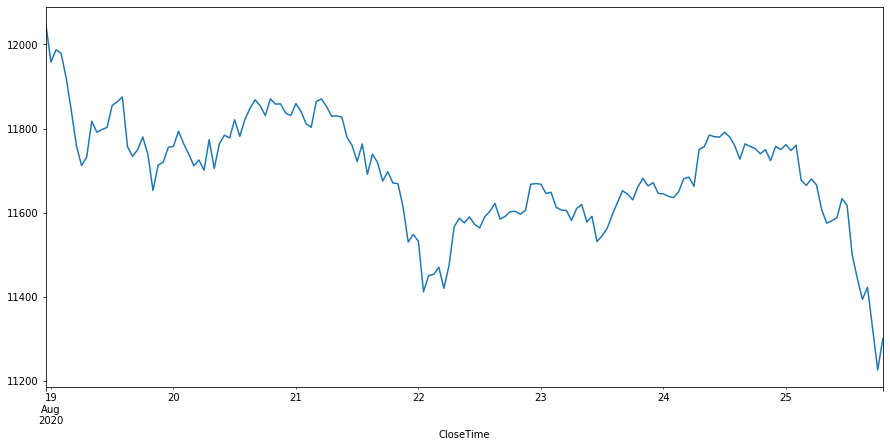

In [13]:
btc['ClosePrice'].plot(figsize=(15,7))

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-08-18 23:00:00,427.90,428.32,424.73,425.57,826.954065,3.527664e+05
2020-08-19 00:00:00,425.08,425.26,422.06,422.09,873.909831,3.700950e+05
2020-08-19 01:00:00,422.15,424.77,420.24,424.69,2537.394849,1.074725e+06
2020-08-19 02:00:00,425.00,426.82,422.74,423.57,1227.568436,5.221535e+05
2020-08-19 03:00:00,423.45,423.45,419.33,420.72,915.797979,3.858716e+05


<AxesSubplot:xlabel='CloseTime'>

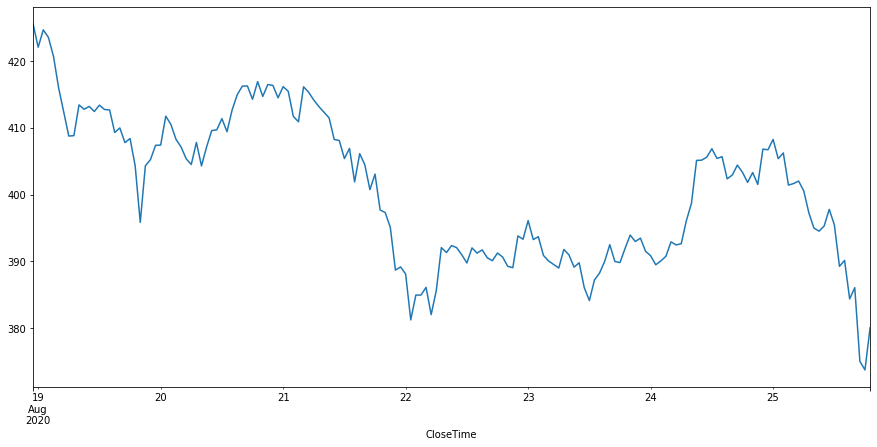

In [15]:
eth['ClosePrice'].plot(figsize=(15,7))

In [16]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02
mean,11697.777576,11728.218727,11658.473939,11692.864242,207.999950,2.430587e+06
std,131.842041,130.952619,138.523394,132.379938,187.634317,2.177721e+06
min,11222.500000,11311.440000,11112.750000,11225.780000,24.548298,2.886566e+05
25%,11608.000000,11634.740000,11582.340000,11606.080000,83.166304,9.980784e+05
50%,11708.420000,11753.640000,11663.590000,11705.210000,144.874017,1.692255e+06
75%,11781.750000,11810.710000,11749.390000,11780.000000,259.045996,3.068492e+06
max,12068.620000,12099.990000,12034.070000,12048.830000,1080.718517,1.215107e+07
